In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pandas as pd

In [2]:
!ls ../predictions/AM0-27_distribution_predictions

output_statistics_test.csv output_statistics_test.pkl


In [3]:
# SFCN_ages # ages1
# SFCN_distribution # distribution1
# original_ages # ages2
# original_distributions # distribution1o
# original_bins # bins1
# SFCN_age_predictions # ages1p

In [4]:
differenceSubjects = ['25380068', '22135288', '21202715', '21269692', '24612030']

SFCN_path = '../predictions/AM0-80_distribution_predictions/output_statistics_test.pkl'
SFCNdf = pd.read_pickle(SFCN_path)
indexes = SFCNdf.index.to_list()
for idx in differenceSubjects:
    if idx in indexes:
        SFCNdf.drop(idx, inplace=True, axis=0)
SFCN_ages = SFCNdf.target_age.to_numpy() #ages1
SFCN_distribution = SFCNdf.output_label.to_numpy() #distribution1
xs = []
for x in SFCN_distribution:
    x = np.exp(x)
    xs.append(x)
SFCN_distribution = np.array(xs)
del xs


SFCN50b_path = '../predictions/AM0-95_distribution_predictions/output_statistics_test.pkl'
SFCN50bdf = pd.read_pickle(SFCN50b_path)
indexes = SFCN50bdf.index.to_list()
for idx in differenceSubjects:
    if idx in indexes:
        SFCN50bdf.drop(idx, inplace=True, axis=0)
SFCN50b_ages = SFCN50bdf.target_age.to_numpy()
SFCN50b_distribution = SFCN50bdf.output_label.to_numpy()
xs = []
for x in SFCN50b_distribution:
    x = np.exp(x)
    xs.append(x)
SFCN50b_distribution = np.array(xs)
del xs


SFCN50b10s_path = '../predictions/AM0-100_distribution_predictions/output_statistics_test.pkl'
SFCN50b10sdf = pd.read_pickle(SFCN50b10s_path)
indexes = SFCN50b10sdf.index.to_list()
for idx in differenceSubjects:
    if idx in indexes:
        SFCN50b10sdf.drop(idx, inplace=True, axis=0)
SFCN50b10s_ages = SFCN50b10sdf.target_age.to_numpy()
SFCN50b10s_distribution = SFCN50b10sdf.output_label.to_numpy()
xs = []
for x in SFCN50b10s_distribution:
    x = np.exp(x)
    xs.append(x)
SFCN50b10s_distribution = np.array(xs)
del xs

In [5]:
original_ages = '../additional_codes/dataset_generation/female_test_age.npy' #ages2
original_distributions = '../additional_codes/dataset_generation/female_test_age_labels.npy' #distribution1o
original_bins = '../additional_codes/dataset_generation/bin_centers.npy' #bins1

original_ages = np.load(original_ages)
original_distributions = np.load(original_distributions)
original_bins = np.load(original_bins)

SFCN_age_predictions = np.matmul(SFCN_distribution, original_bins)

original50b_distributions = '../additional_codes/dataset_generation/female_test_age_labels_50b.npy' #distribution1o
original50b_bins = '../additional_codes/dataset_generation/bin_centers_50b.npy' #bins1

original50b_distributions = np.load(original50b_distributions)
original50b_bins = np.load(original50b_bins)

SFCN50b_age_predictions = np.matmul(SFCN50b_distribution, original50b_bins)

original50b10s_distributions = '../additional_codes/dataset_generation/female_test_age_labels_50b10s.npy' #distribution1o
original50b10s_bins = '../additional_codes/dataset_generation/bin_centers_50b10s.npy' #bins1

original50b10s_distributions = np.load(original50b10s_distributions)
original50b10s_bins = np.load(original50b10s_bins)

SFCN50b10s_age_predictions = np.matmul(SFCN50b10s_distribution, original50b10s_bins)

52.89965753424667


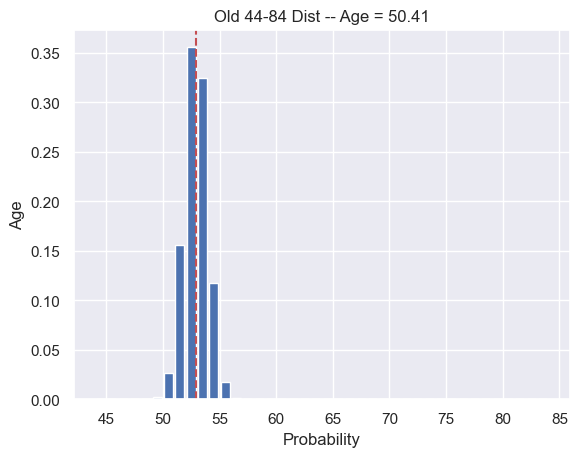

---
52.89965753424667


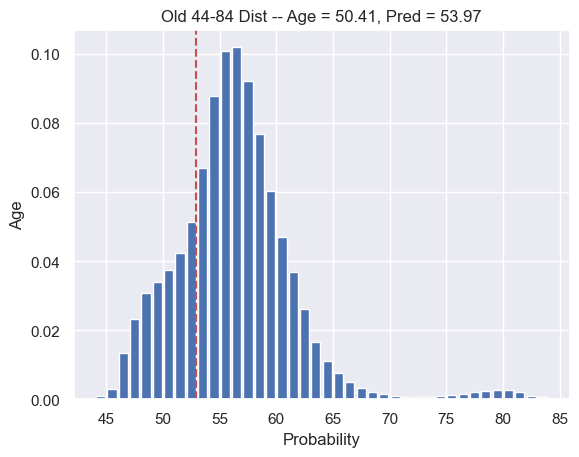

In [78]:
print(SFCN_ages[880])
plt.bar(original_bins, original_distributions[880])
plt.axvline(x=SFCN_ages[880], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(SFCN_ages[881]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()
print('---')
print(SFCN_ages[880])
plt.bar(original_bins, SFCN_distribution[880])
plt.axvline(x=SFCN_ages[880], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[881], SFCN_age_predictions[881]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

In [81]:
arr1inds = SFCN_ages.argsort()
SFCN_ages = SFCN_ages[arr1inds]
original_ages = original_ages[arr1inds]
SFCN_distribution = SFCN_distribution[arr1inds]
original_distributions = original_distributions[arr1inds]
SFCN_age_predictions = SFCN_age_predictions[arr1inds]

arr1inds = SFCN50b_ages.argsort()
SFCN50b_ages = SFCN50b_ages[arr1inds]
SFCN50b_distribution = SFCN50b_distribution[arr1inds]
original50b_distributions = original50b_distributions[arr1inds]
SFCN50b_age_predictions = SFCN50b_age_predictions[arr1inds]

arr1inds = SFCN50b10s_ages.argsort()
SFCN50b10s_ages = SFCN50b10s_ages[arr1inds]
SFCN50b10s_distribution = SFCN50b10s_distribution[arr1inds]
original50b10s_distributions = original50b10s_distributions[arr1inds]
SFCN50b10s_age_predictions = SFCN50b10s_age_predictions[arr1inds]

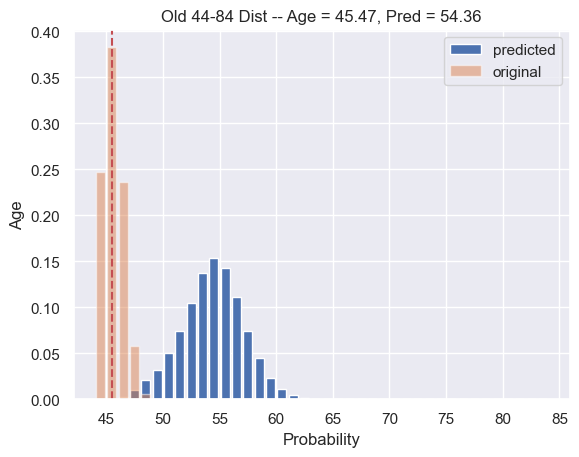

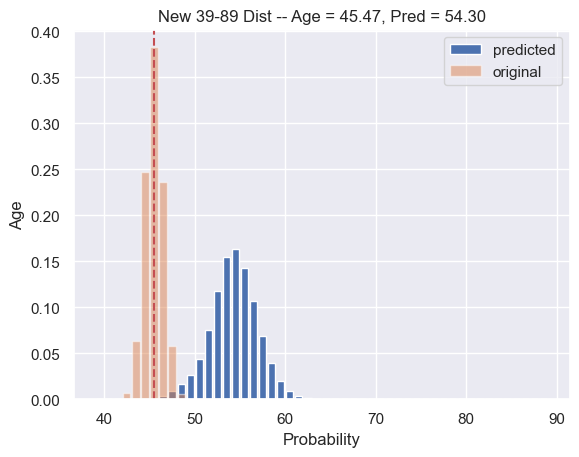

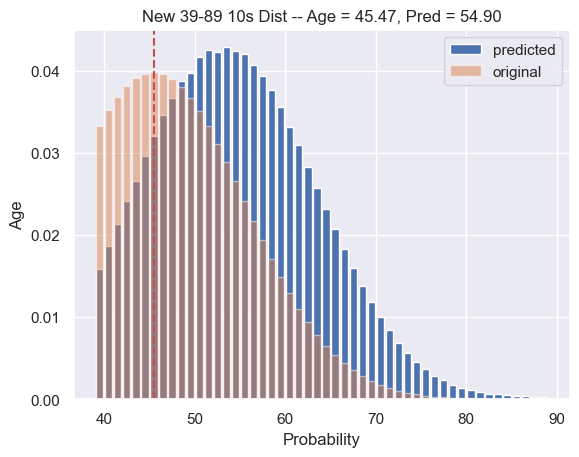

In [82]:
####
# 1. 1st Row - Extreme cases at the young end

i=0

plt.bar(original_bins, SFCN_distribution[i], label = 'predicted')
plt.bar(original_bins, original_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

plt.bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
plt.bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

plt.bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
plt.bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 10s Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

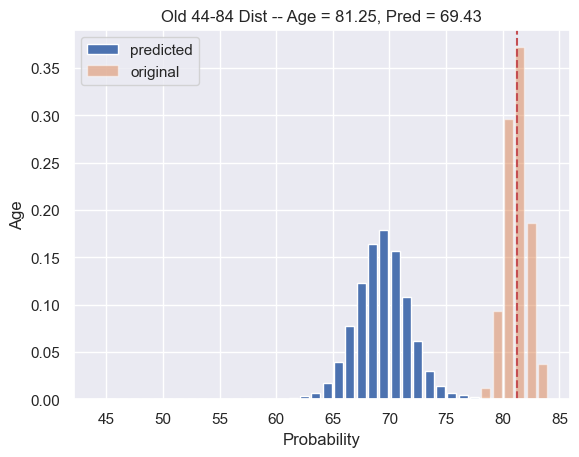

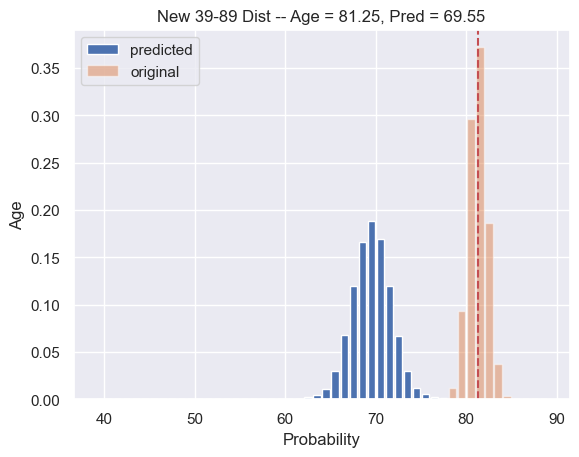

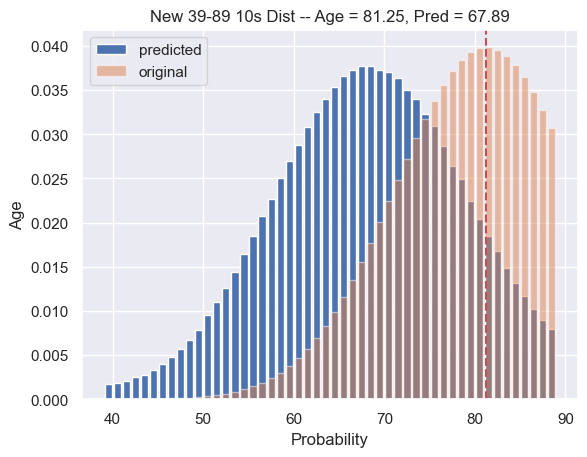

In [83]:
####
# 2nd Row - Extreme cases at the old end

i=-1

plt.bar(original_bins, SFCN_distribution[i], label = 'predicted')
plt.bar(original_bins, original_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

plt.bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
plt.bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

plt.bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
plt.bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 10s Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()


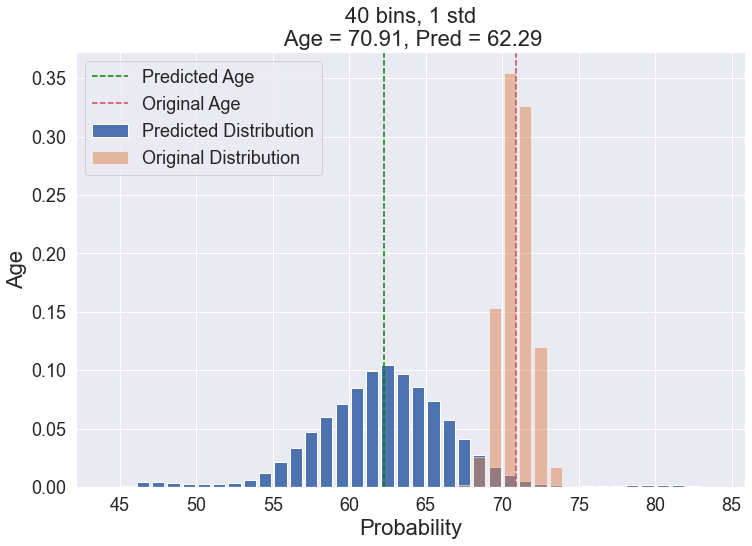

In [43]:
####
# 2nd Row - Extreme cases at the old end

ncols=3
nrows=3
sz=7.2
title_font_size=22
ticks_font_size=18
legend_font = 18


i = np.round(np.random.uniform(low=1, high=5022), 0).astype(int)

plt.figure(figsize=(12,8))

plt.axvline(x=SFCN_age_predictions[i], ymin=0, ymax=1, c='green', ls='--', label='Predicted Age')
plt.axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')

plt.bar(original_bins, SFCN_distribution[i], label = 'Predicted Distribution')
plt.bar(original_bins, original_distributions[i], alpha=0.5, label='Original Distribution')

plt.title('40 bins, 1 std\n Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]),
         fontsize=title_font_size)
plt.ylabel('Age', fontsize=title_font_size)
plt.xlabel('Probability', fontsize=title_font_size)
plt.legend(fontsize=legend_font)
plt.xticks(fontsize=ticks_font_size)
plt.yticks(fontsize=ticks_font_size)
plt.show()

In [84]:
# SFCN_ages # ages1
# SFCN_distribution # distribution1
# original_ages # ages2
# original_distributions # distribution1o
# original_bins # bins1
# SFCN_age_predictions # ages1p

In [85]:
# Filure 40 = 1681

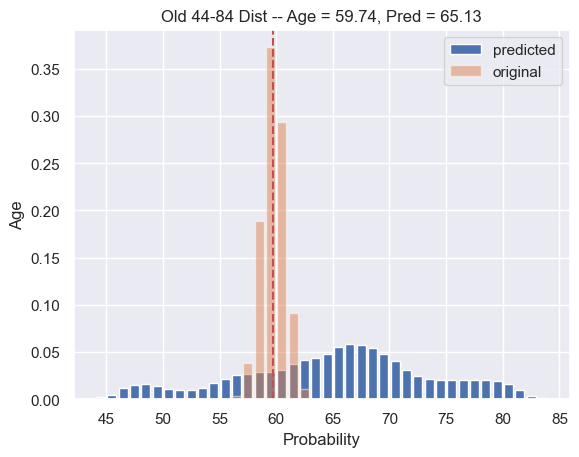

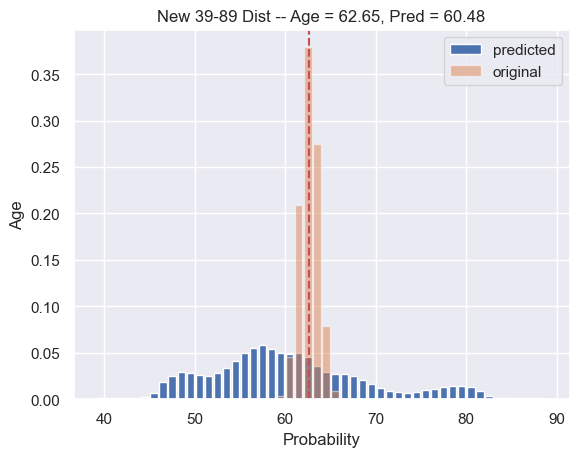

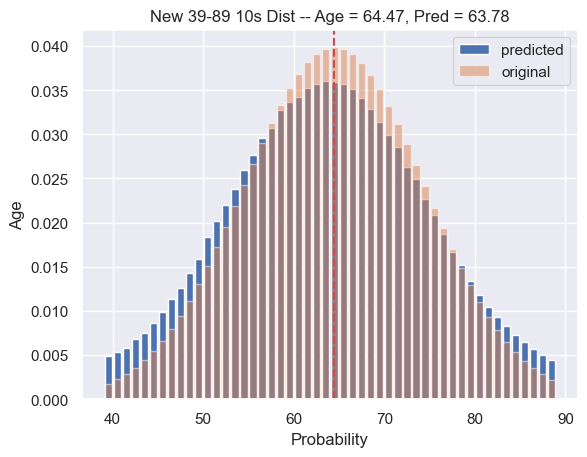

In [90]:
i=1680

plt.bar(original_bins, SFCN_distribution[i], label = 'predicted')
plt.bar(original_bins, original_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

i = 2310

plt.bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
plt.bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

i = 2727

plt.bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
plt.bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
plt.axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 10s Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

# SHOULD PROBABLY VISUALLY INSPECT THOSE EQUIVALENT SUBJECTS AS WELL
# AFAI can tell, the problems do not seem to appear for 50b10s

 ========= AGE RANGE: 45.0 - 50.0 ======== 


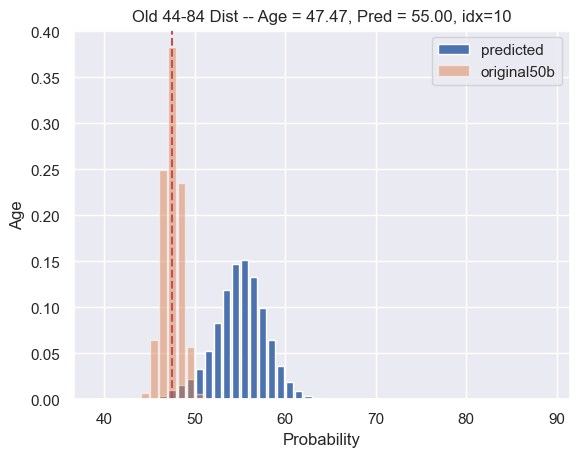

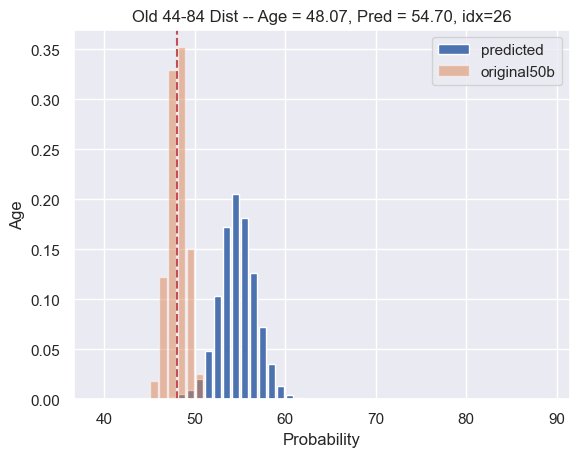

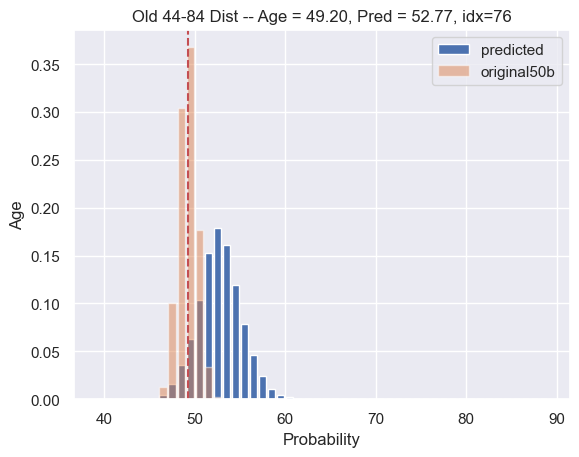

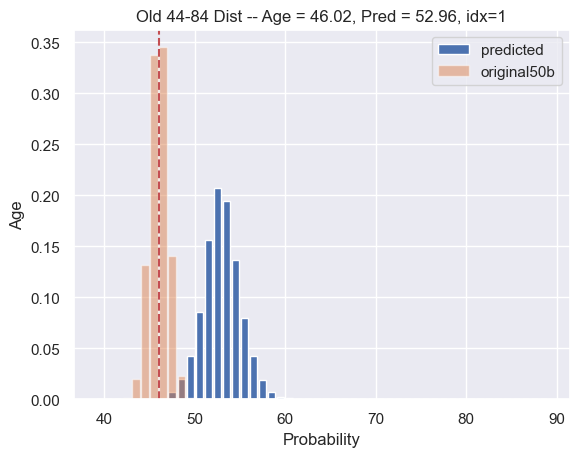

 ========= AGE RANGE: 50.0 - 55.0 ======== 


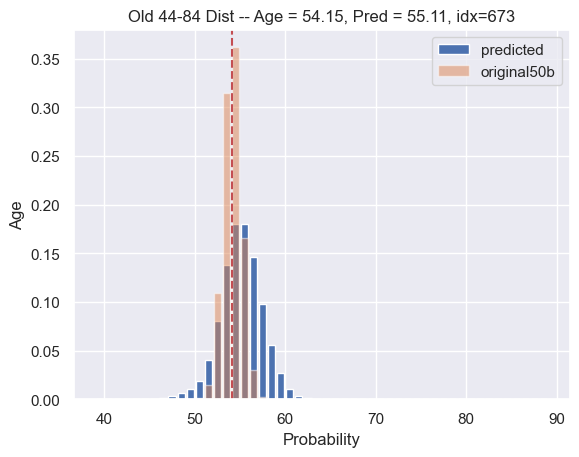

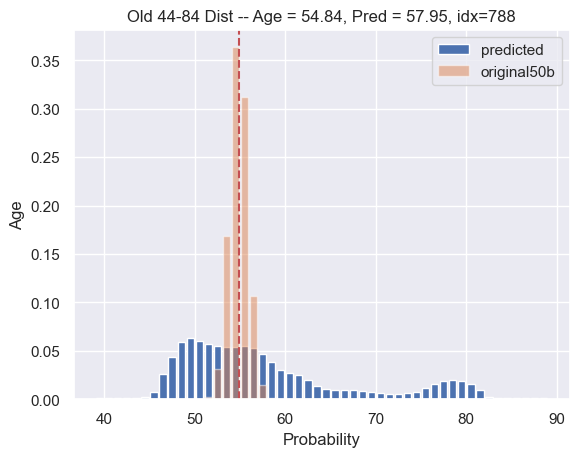

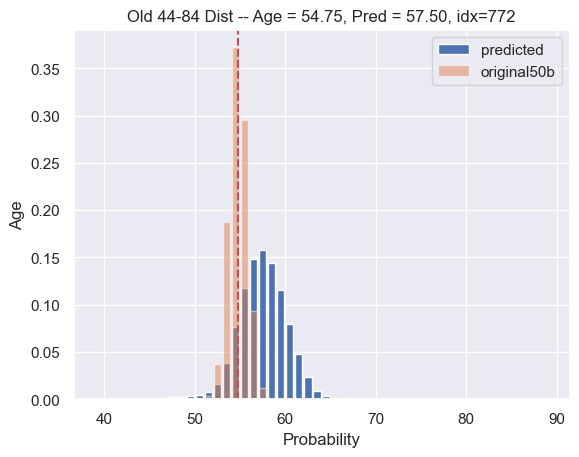

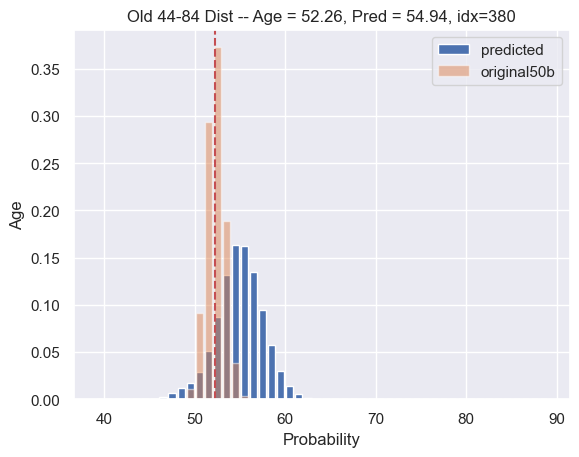

 ========= AGE RANGE: 55.0 - 60.0 ======== 


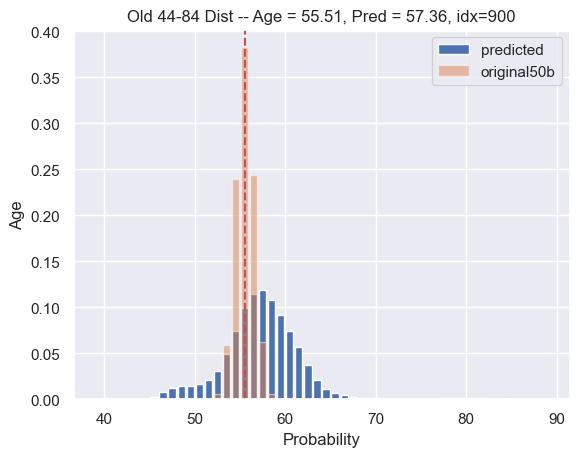

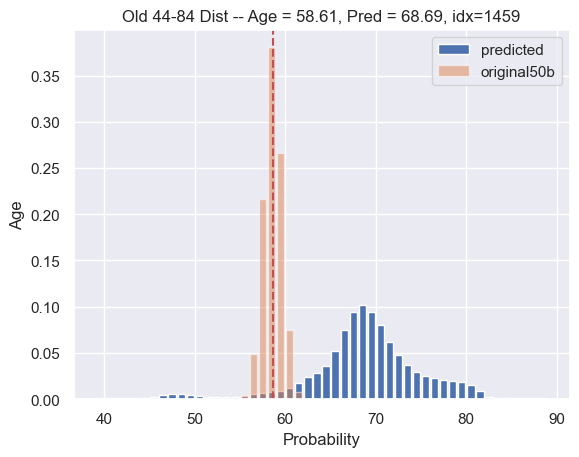

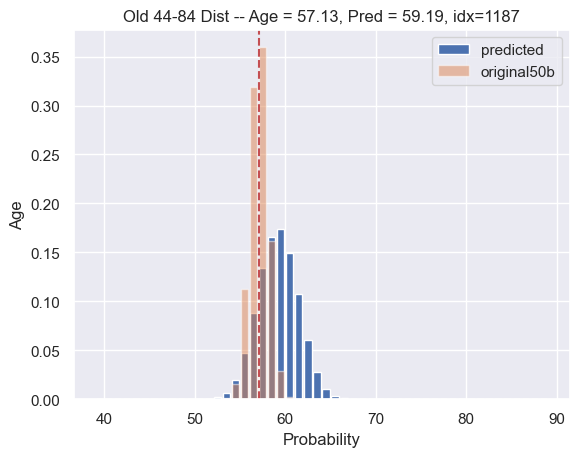

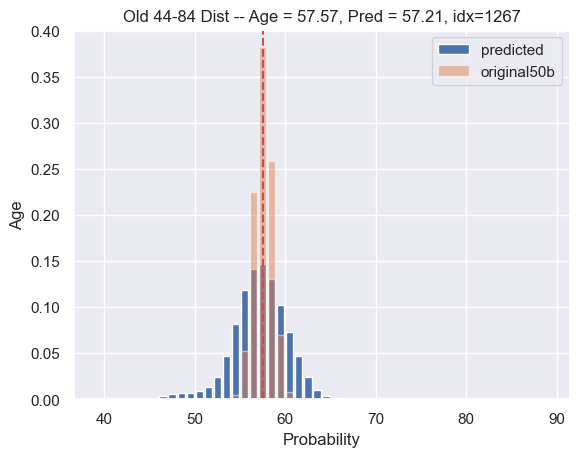

 ========= AGE RANGE: 60.0 - 65.0 ======== 


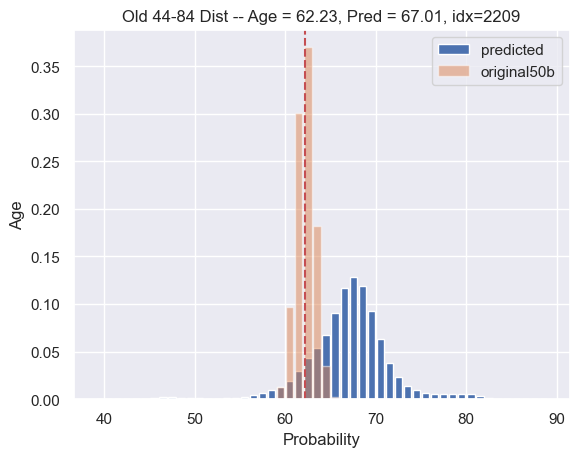

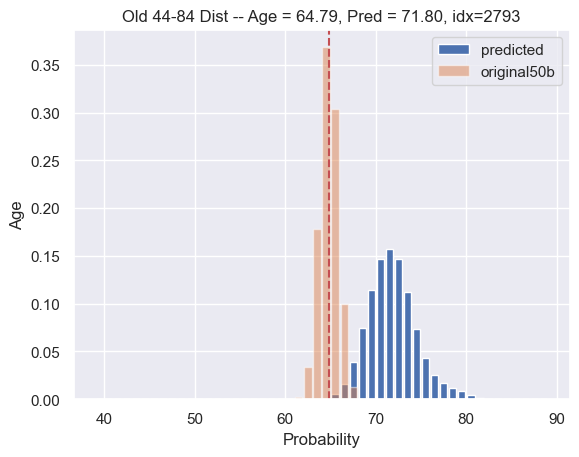

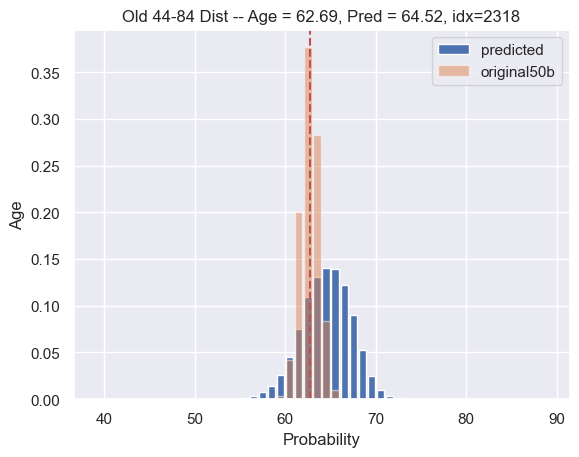

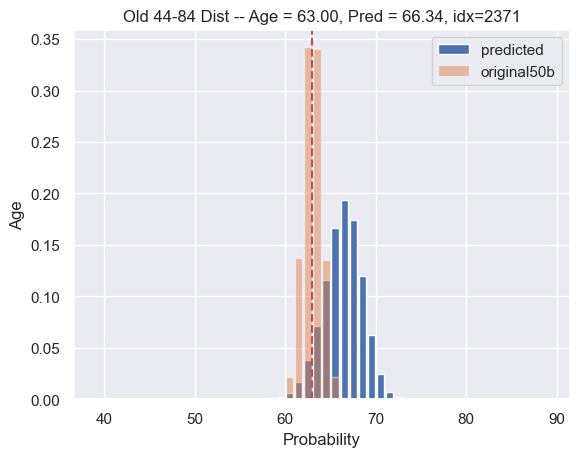

 ========= AGE RANGE: 65.0 - 70.0 ======== 


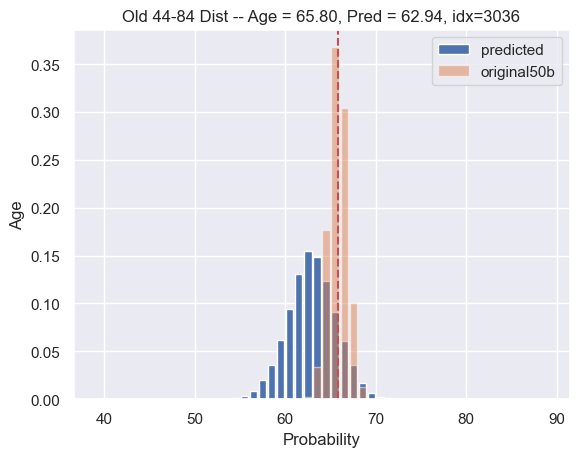

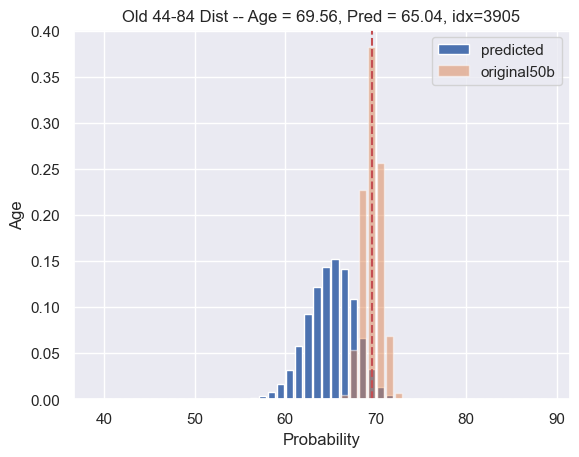

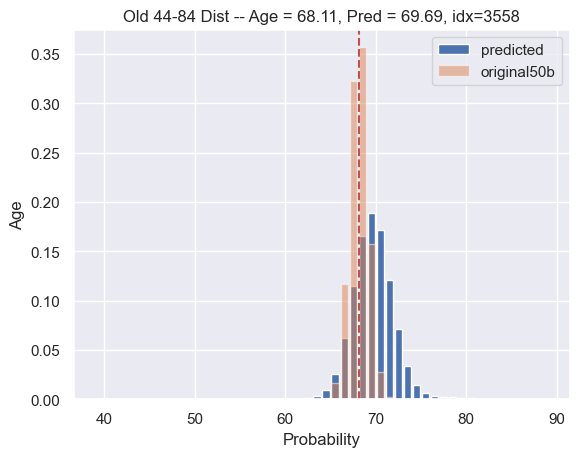

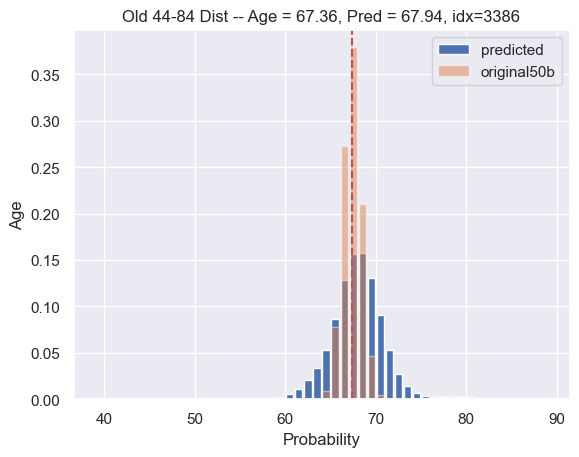

 ========= AGE RANGE: 70.0 - 75.0 ======== 


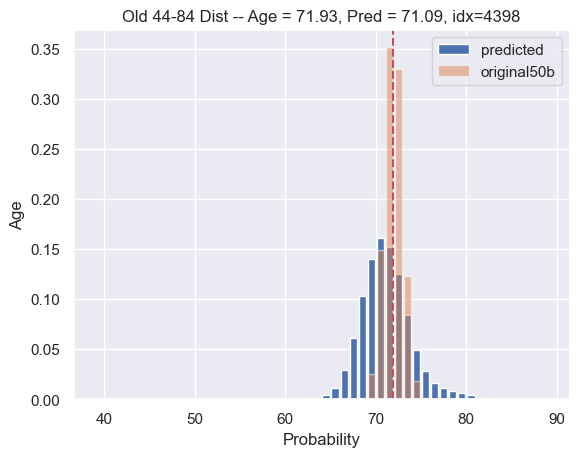

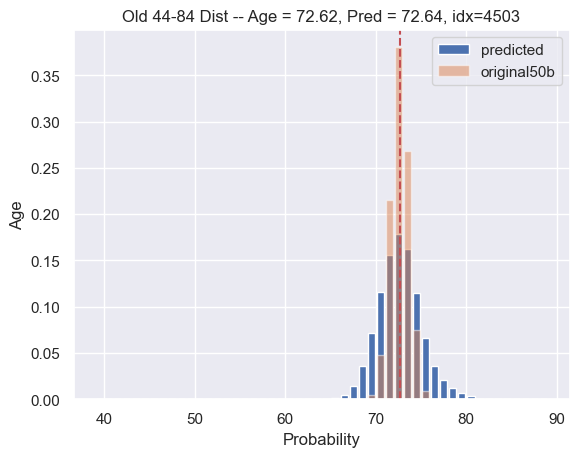

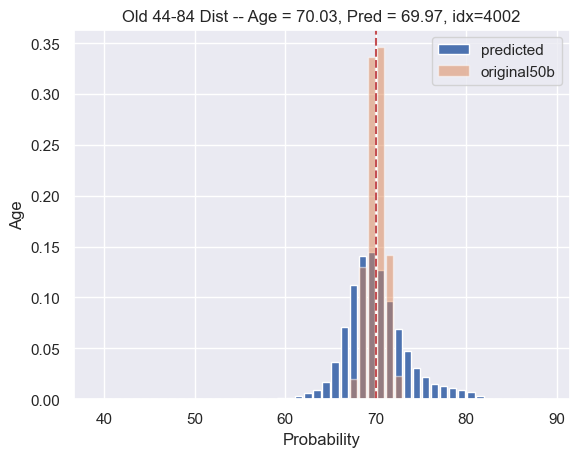

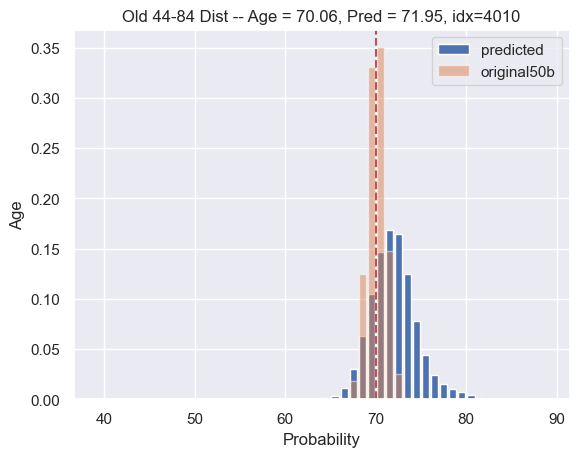

 ========= AGE RANGE: 75.0 - 80.0 ======== 


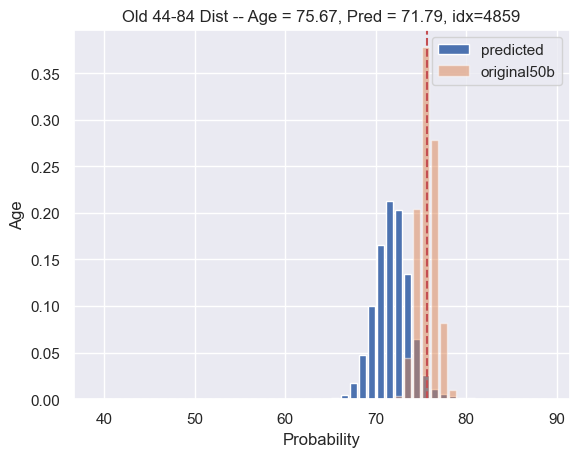

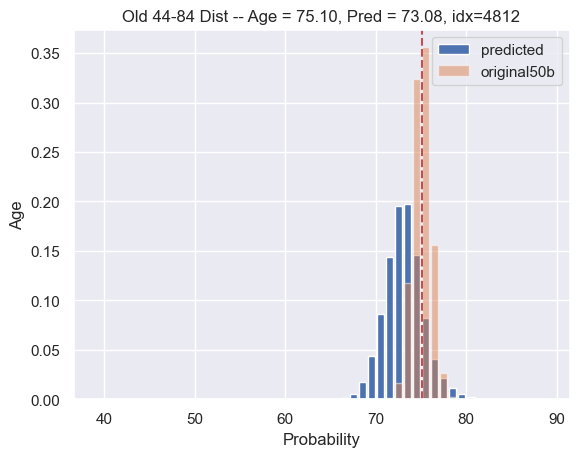

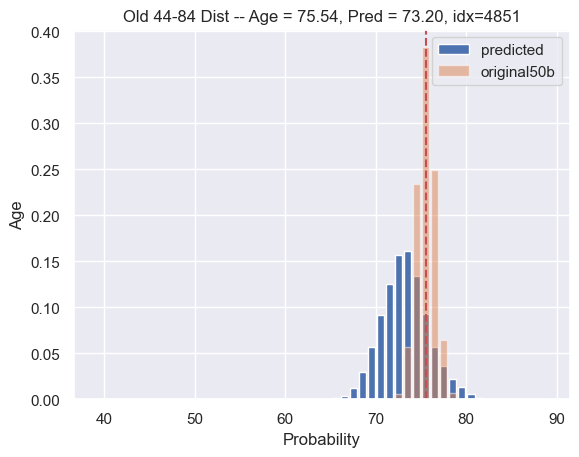

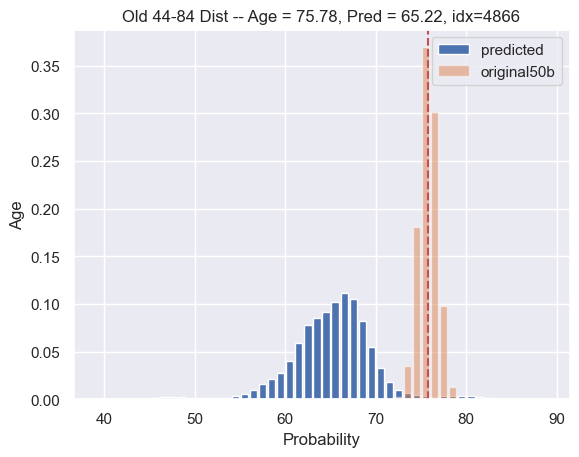

 ========= AGE RANGE: 80.0 - 85.0 ======== 


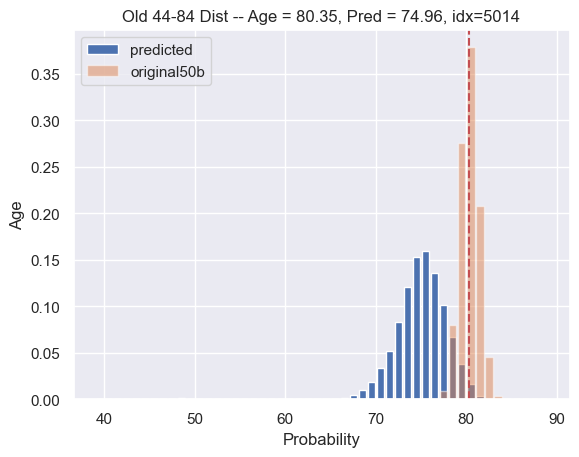

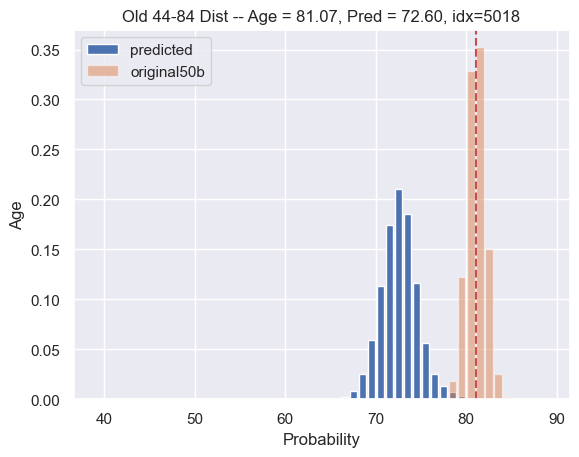

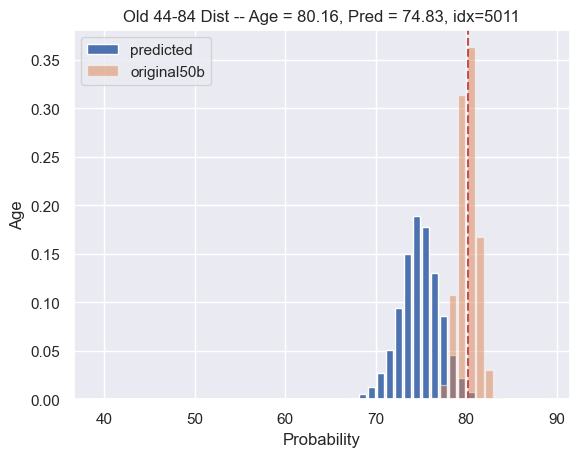

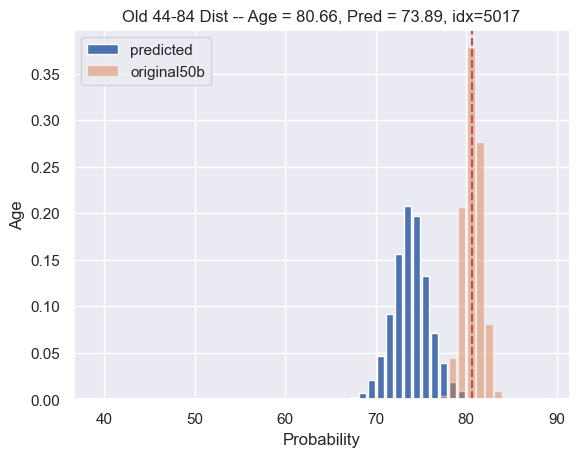

In [91]:
age_bins = np.linspace(45,85,9)

for idx, age in enumerate(age_bins[:-1]):
    age1 = SFCN50b_ages[(np.where((SFCN50b_ages >= age) & (SFCN50b_ages <= age_bins[idx+1] )))]
    dist1 = SFCN50b_distribution[(np.where((SFCN50b_ages >= age) & (SFCN50b_ages <= age_bins[idx+1] )))]
    age1p = SFCN50b_age_predictions[(np.where((SFCN50b_ages >= age) & (SFCN50b_ages <= age_bins[idx+1] )))]
    dist1o = original50b_distributions[(np.where((SFCN50b_ages >= age) & (SFCN50b_ages <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    if len(age1) >= 4:
        random_subjects = np.random.choice(age1, size=4, replace=False)
    else:
        random_subjects = np.random.choice(age1, size=len(age1), replace=False)
        
    for subj in random_subjects:
        i = np.where(age1==subj)[0][0].astype(int)
        idss = np.where(SFCN50b_ages==subj)[0][0].astype(int)
        plt.bar(original50b_bins, dist1[i], label = 'predicted')
        plt.bar(original50b_bins, dist1o[i], alpha=0.5, label='original50b')
        plt.axvline(x=age1[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('Old 44-84 Dist -- Age = {:.2f}, Pred = {:.2f}, idx={}'.format(age1[i], age1p[i], idss))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.legend()
        plt.show()

In [92]:
(dist1[-1] > 5e-3).sum()

11

In [93]:
# MAYBE HERE ALSO ADD THE PREDICTED AND ORIGINAL AGE AS A PRINT 


counter = 0
grotpa = []
grota = []
for idx, dist in enumerate(SFCN50b10s_distribution):
    if (dist > 1e-2).sum() > 37:
        print(idx, '---', SFCN50b10s_ages[idx], SFCN50b10s_age_predictions[idx])
        counter += 1
print('------->', counter)
#         i = idx
#         plt.bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
#         plt.bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
#         plt.axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
#         plt.title('New 39-89 10s Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]))
#         plt.ylabel('Age')
#         plt.xlabel('Probability')
#         plt.legend()
#         plt.show()

counter = 0
for idx, dist in enumerate(SFCN50b_distribution):
    if (dist > 1e-2).sum() > 25:
        print(idx, '---', SFCN50b_ages[idx], SFCN50b_age_predictions[idx])
        counter += 1
        
#         i=idx
#         plt.bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
#         plt.bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
#         plt.axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--')
#         plt.title('New 39-89 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]))
#         plt.ylabel('Age')
#         plt.xlabel('Probability')
#         plt.legend()
#         plt.show()
        
print('------->', counter)

counter = 0
for idx, dist in enumerate(SFCN_distribution):
    if (dist > 1e-2).sum() > 25:
        print(idx, '---', SFCN_ages[idx], SFCN_age_predictions[idx])
        counter += 1
        
#         i=idx
#         plt.bar(original_bins, SFCN_distribution[i], label = 'predicted')
#         plt.bar(original_bins, original_distributions[i], alpha=0.5, label='original')
#         plt.axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--')
#         plt.title('Old 44-85 Dist -- Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]))
#         plt.ylabel('Age')
#         plt.xlabel('Probability')
#         plt.legend()
#         plt.show()
        
print('------->', counter)

363 --- 52.122031963470135 59.441629561188165
859 --- 55.299200913241975 60.34548665548209
955 --- 55.87408675799088 64.39305238239467
2163 --- 61.978881278538665 59.47084279108094
3322 --- 67.06079234972685 66.18465226131957
3530 --- 67.99554794520554 68.44632223865483
4893 --- 76.13641552511399 66.37931219825987
-------> 7
530 --- 53.25204918032796 63.61903054709546
896 --- 55.493493150685026 58.58478749549249
1029 --- 56.26860730593603 63.09024462819798
1049 --- 56.41700913242016 59.4109989341232
1095 --- 56.65924657534242 62.86952443938935
1361 --- 58.11221461187233 61.52957121684449
1556 --- 59.131830601092815 63.40101649609278
1559 --- 59.13641552511399 61.54106607218273
1680 --- 59.738470319634644 65.60665174433962
1707 --- 59.88299086757979 61.10541839216603
1828 --- 60.46312785388113 65.69981187803205
1834 --- 60.48458904109589 65.37200276821386
1852 --- 60.58299086757984 65.53618114150595
1922 --- 60.92659817351614 59.51077722123591
1957 --- 61.10079908675789 65.3157430104329

In [94]:
# SFCN_ages # ages1
# SFCN_distribution # distribution1
# original_ages # ages2
# original_distributions # distribution1o
# original_bins # bins1
# SFCN_age_predictions # ages1p

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


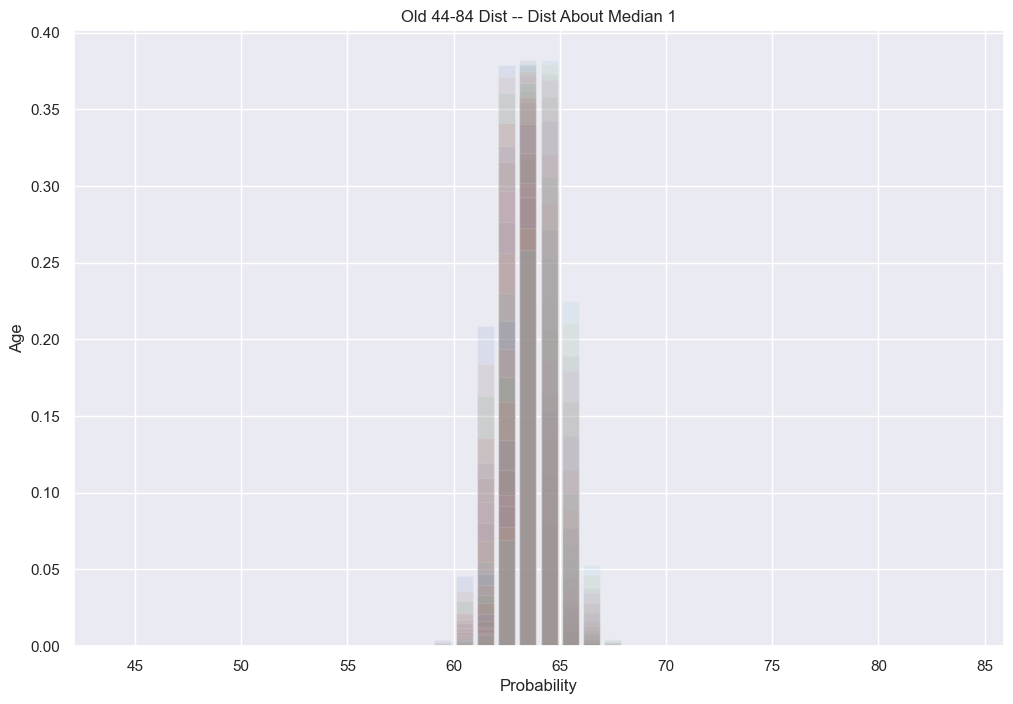

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


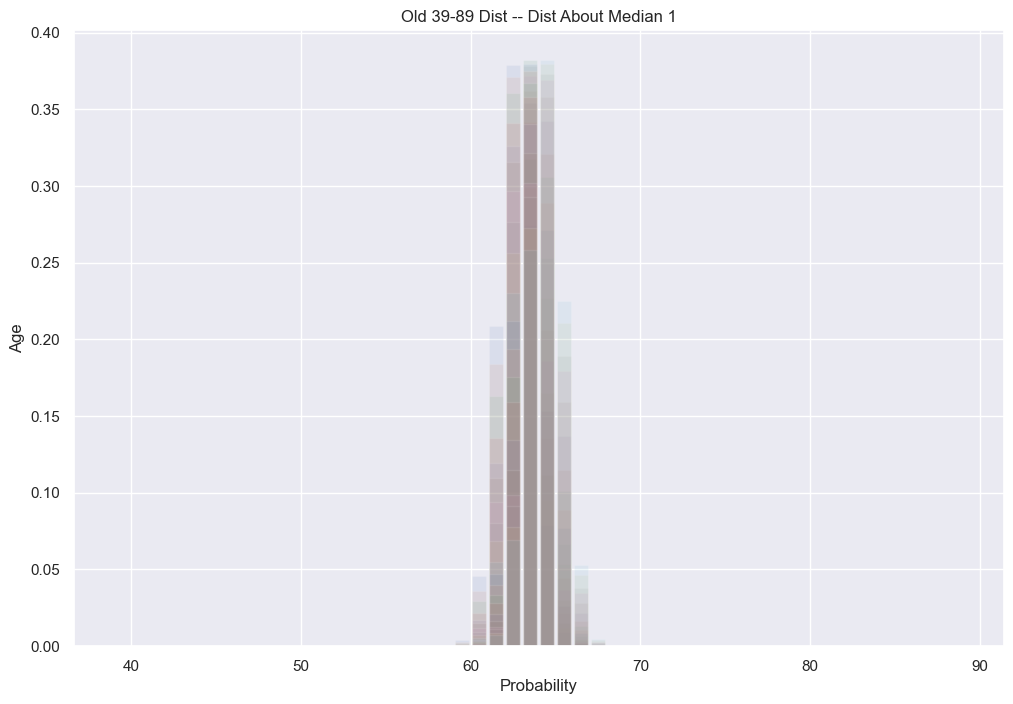

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


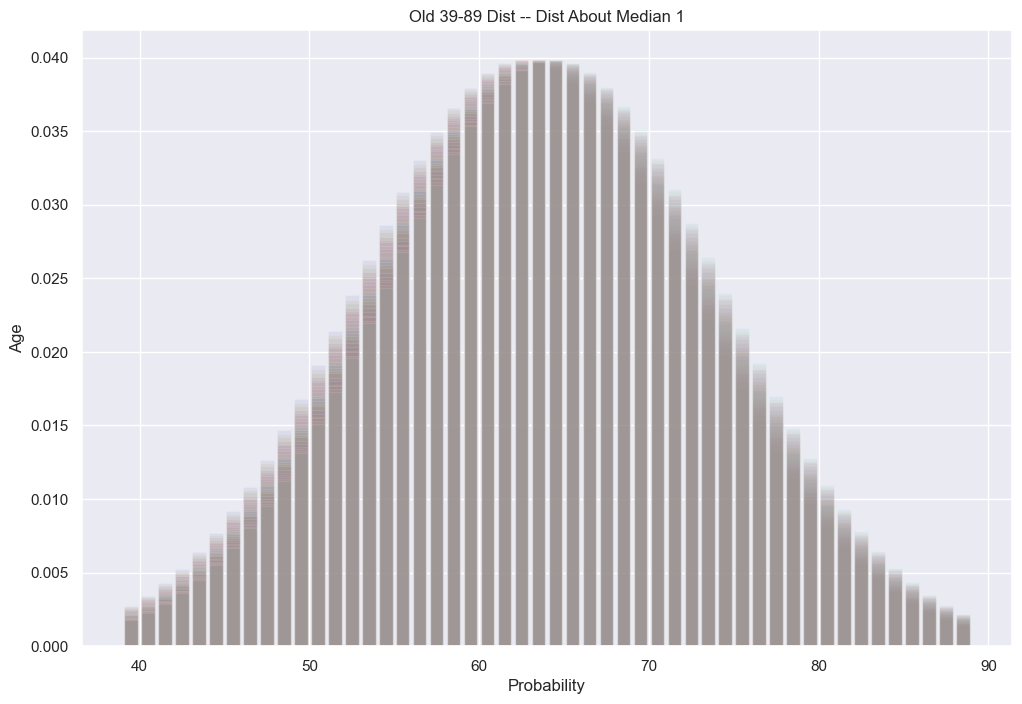

In [95]:
lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original_bins, original_distributions[elem], 
            label=str(SFCN_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(SFCN_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()


lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN50b_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original50b_bins, original50b_distributions[elem], 
            label=str(SFCN50b_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 39-89 Dist -- Dist About Median 1'.format(SFCN50b_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()


lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN50b10s_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original50b10s_bins, original50b10s_distributions[elem], 
            label=str(SFCN50b10s_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 39-89 Dist -- Dist About Median 1'.format(SFCN50b10s_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


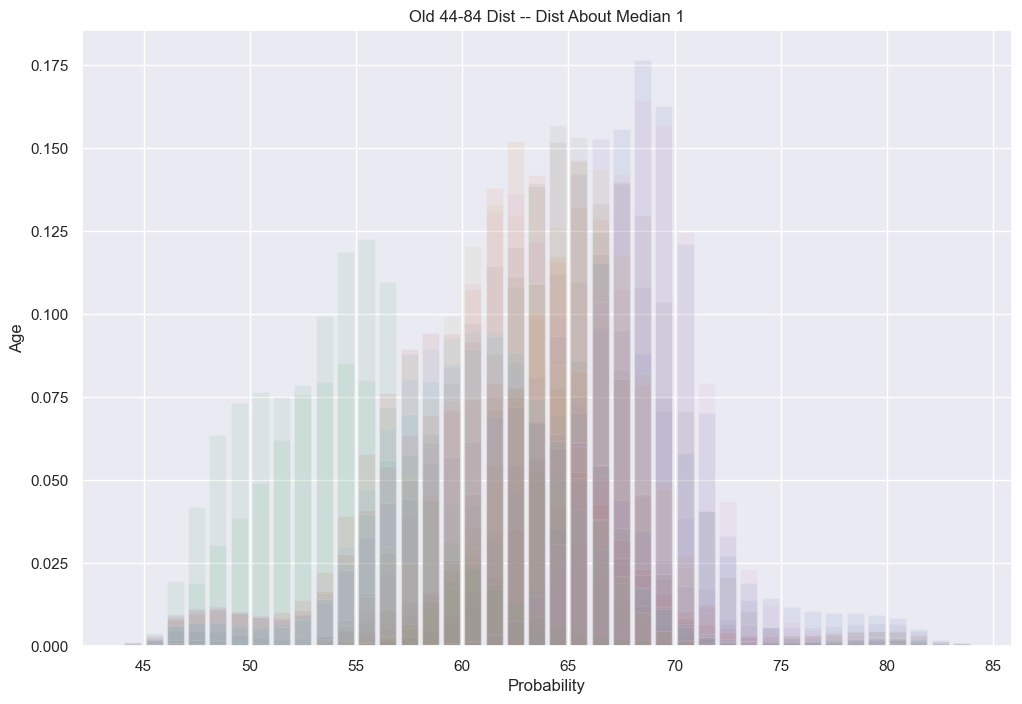

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


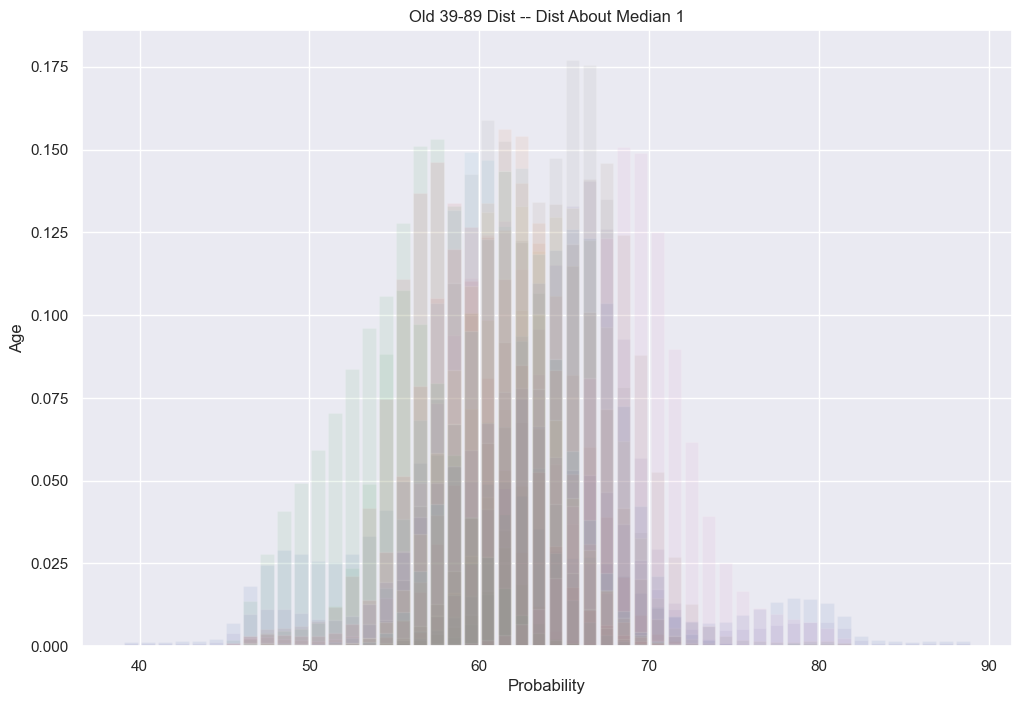

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


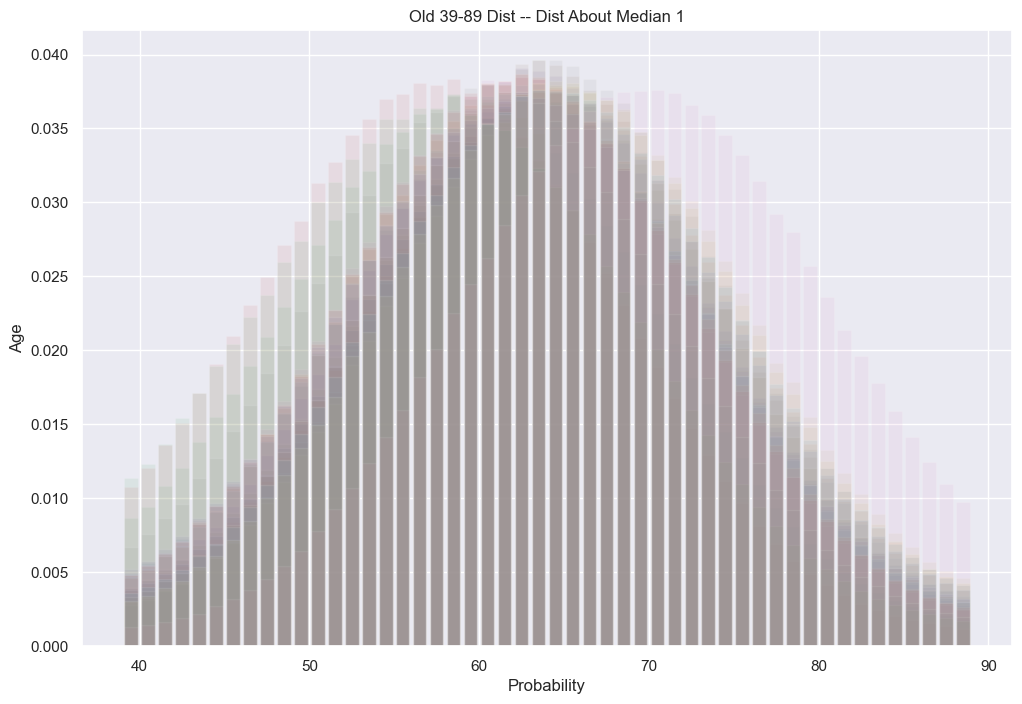

In [96]:
lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original_bins, SFCN_distribution[elem], 
            label=str(SFCN_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(SFCN_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()


lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN50b_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original50b_bins, SFCN50b_distribution[elem], 
            label=str(SFCN50b_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 39-89 Dist -- Dist About Median 1'.format(SFCN50b_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()


lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN50b10s_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original50b10s_bins, SFCN50b10s_distribution[elem], 
            label=str(SFCN50b10s_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 39-89 Dist -- Dist About Median 1'.format(SFCN50b10s_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[2310 2331 2352 2373 2394 2415 2436 2457 2478 2499 2520 2541 2562 2583
 2604 2625 2646 2667 2688 2710]
[62.64822404 62.76358447 62.8619863  63.00068306 63.08948087 63.14828767
 63.24600457 63.34121005 63.43436073 63.55125571 63.63390411 63.71792237
 63.80122951 63.88116438 64.00719178 64.11815068 64.21792237 64.26221461
 64.35901826 64.42568493]


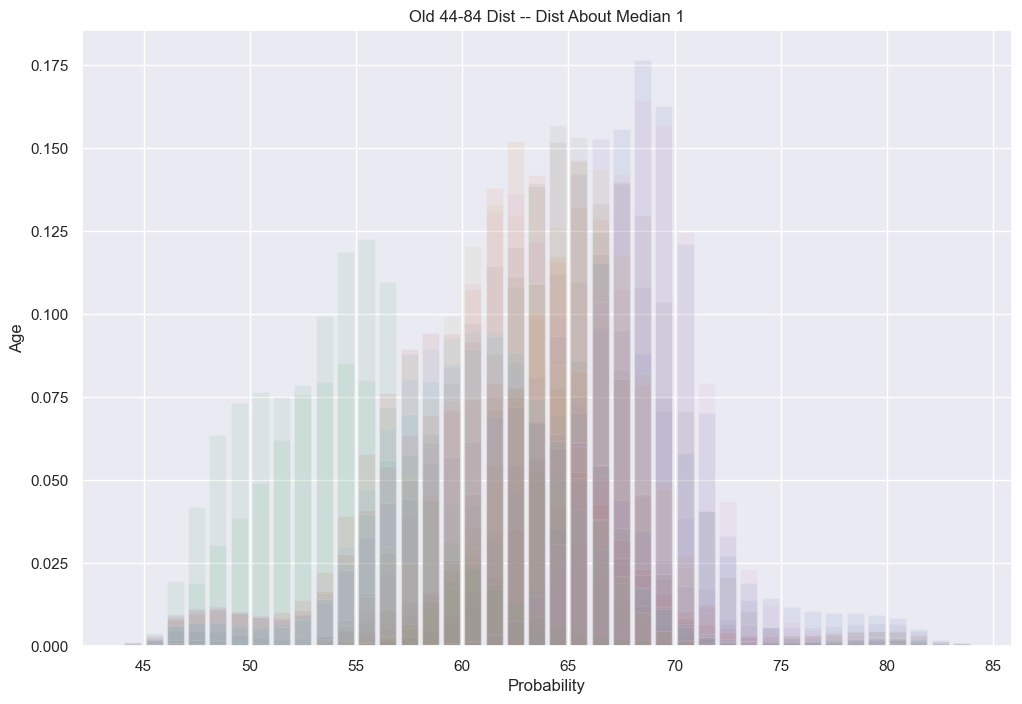

In [97]:
lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

print(elems)
print(SFCN_ages[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(original_bins, SFCN_distribution[elem], 
            label=str(SFCN_ages[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(SFCN_ages[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

/var/folders/kd/38xskn4d5qgfpsl_d52vy51m0000gr/T/ipykernel_26957/505553258.py:140: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolour" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('Han_Data_Distributions.png', bbox_inches='tight', facecolour='white')


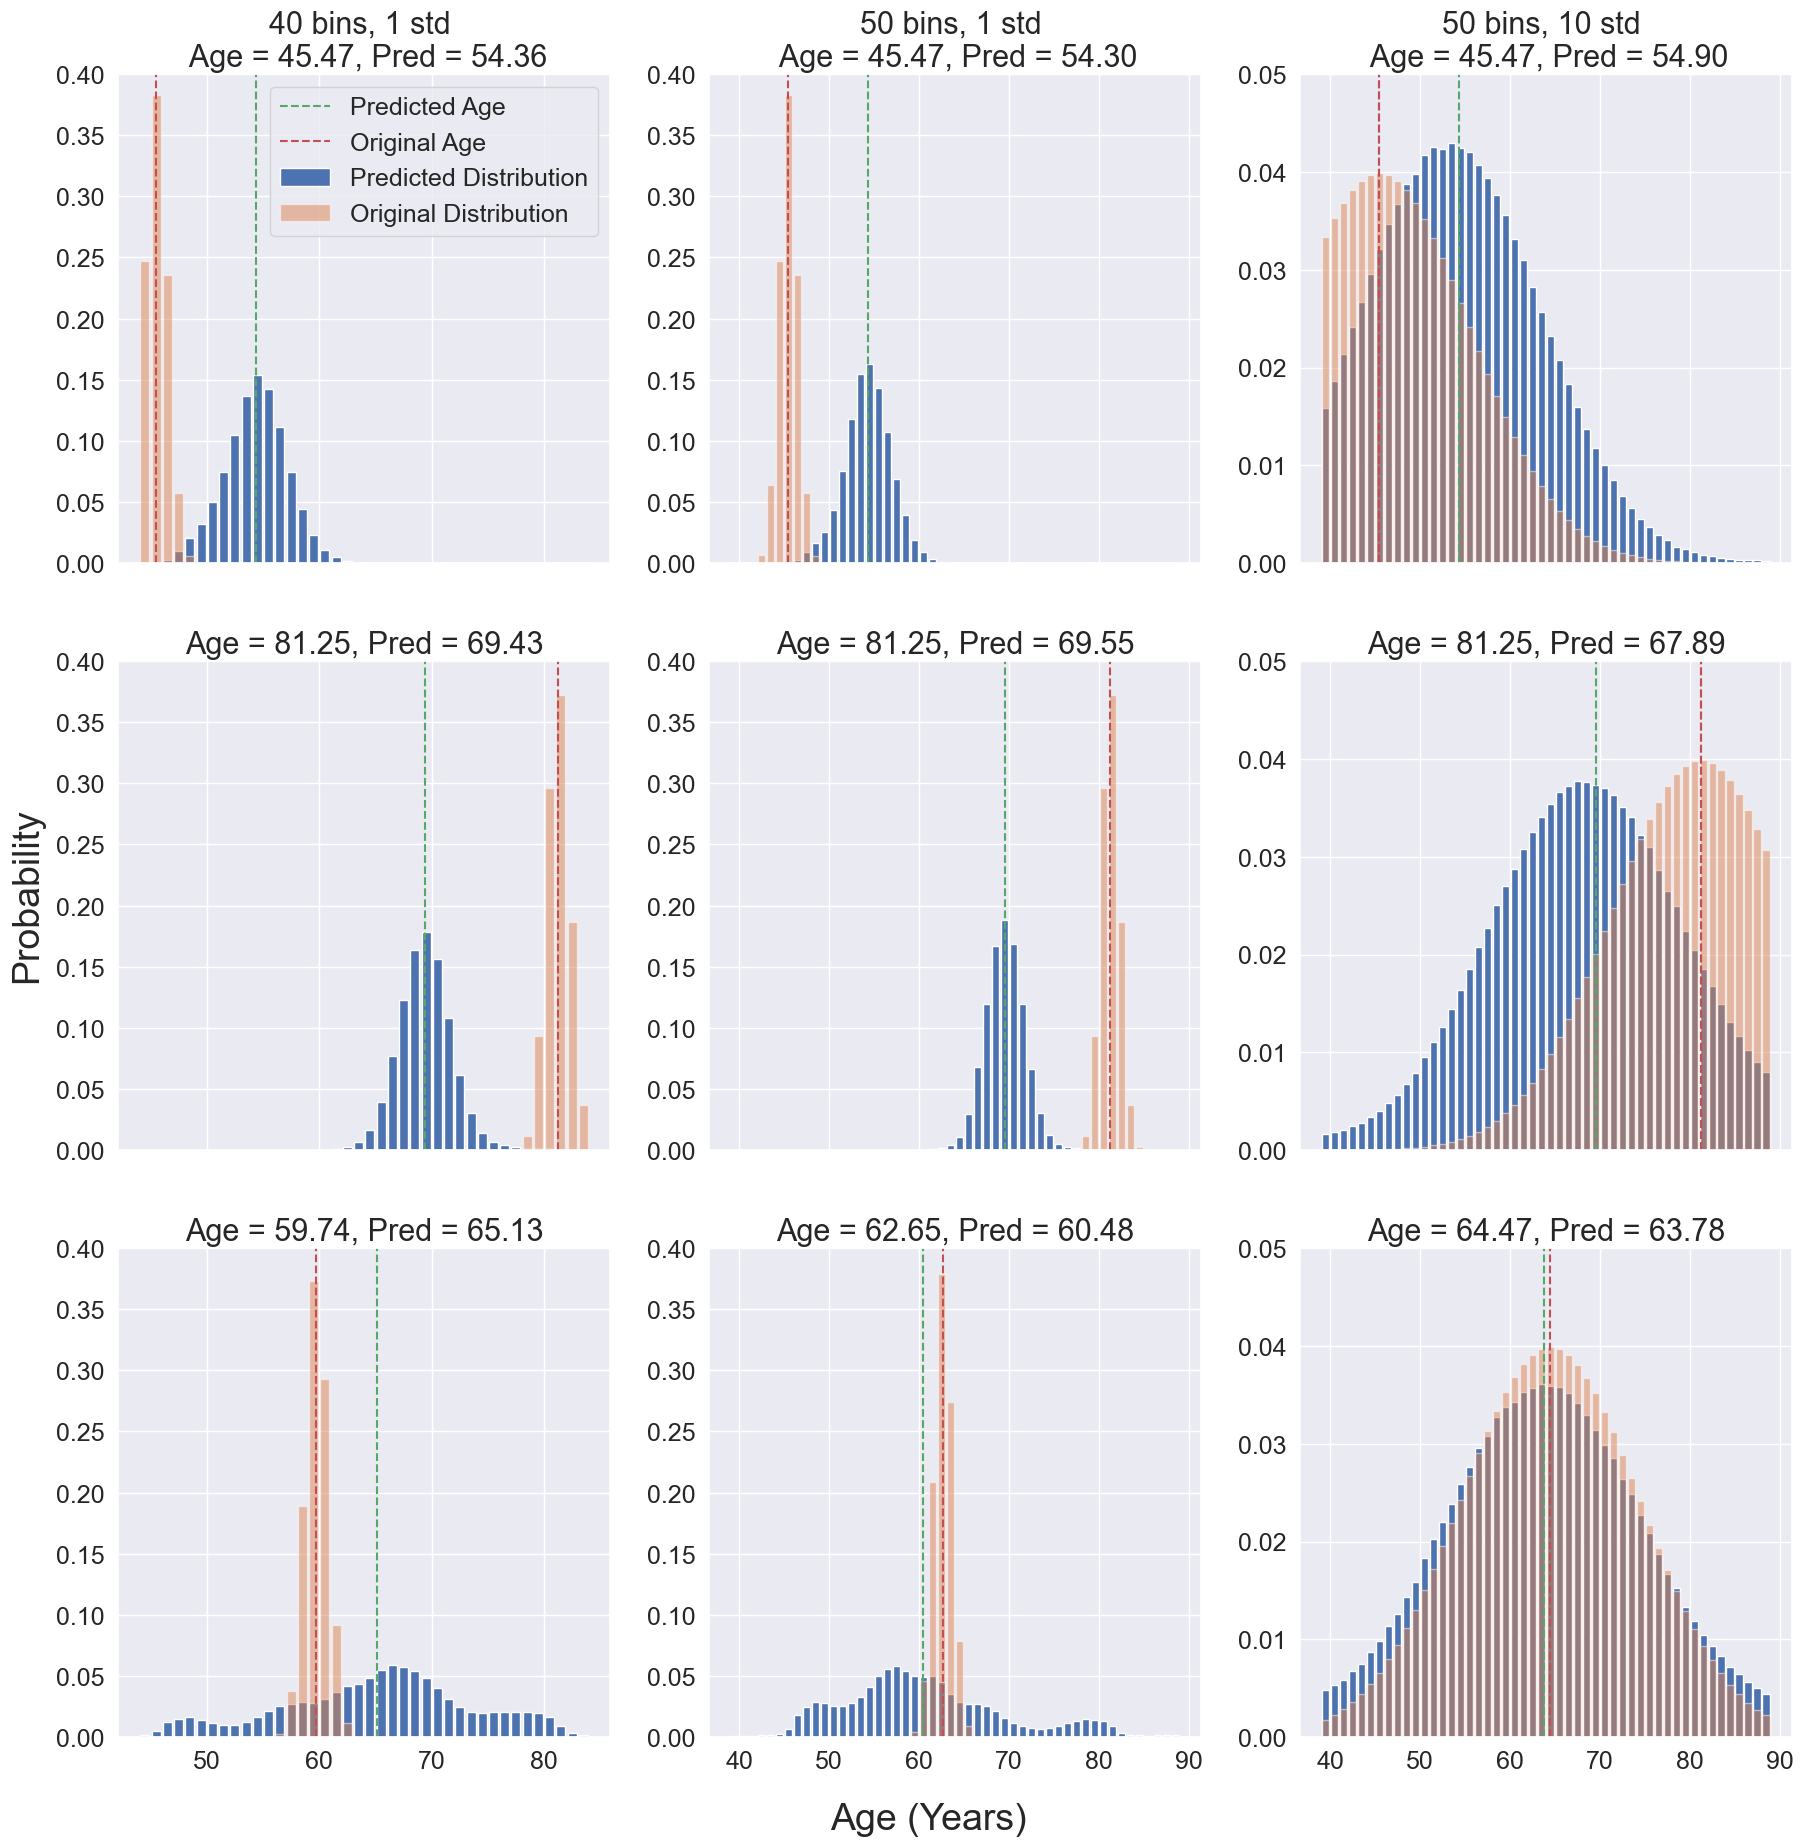

In [103]:
ncols=3
nrows=3
sz=7.2
title_font_size=22
ticks_font_size=18
legend_font = 18

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*sz,nrows*sz))
axes = axes.ravel()

i=0

axes[0].bar(original_bins, SFCN_distribution[i], label = 'Predicted Distribution')
axes[0].bar(original_bins, original_distributions[i], alpha=0.5, label='Original Distribution')
axes[0].axvline(x=SFCN_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[0].axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[0].set_title('40 bins, 1 std \n Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]), fontsize=title_font_size)
# axes[0].set_ylabel('Probability', fontsize=title_font_size)
axes[0].tick_params(axis='x', labelsize= ticks_font_size)
axes[0].tick_params(axis='y', labelsize= ticks_font_size)
axes[0].set_ylim([0, 0.4])
axes[0].legend(fontsize=legend_font, loc=0)

axes[0].axes.xaxis.set_ticklabels([])
# axes[0].axes.yaxis.set_ticklabels([])

axes[1].bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
axes[1].bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
axes[1].axvline(x=SFCN50b_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[1].axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[1].set_title('50 bins, 1 std \n Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]), fontsize=title_font_size)
axes[1].tick_params(axis='x', labelsize= ticks_font_size)
axes[1].tick_params(axis='y', labelsize= ticks_font_size)
axes[1].set_ylim([0, 0.4])

axes[1].axes.xaxis.set_ticklabels([])
# axes[1].axes.yaxis.set_ticklabels([])

axes[2].bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
axes[2].bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
axes[2].axvline(x=SFCN50b_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[2].axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[2].axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
axes[2].set_title('50 bins, 10 std \n Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]), fontsize=title_font_size)
axes[2].tick_params(axis='x', labelsize= ticks_font_size)
axes[2].tick_params(axis='y', labelsize= ticks_font_size)
axes[2].set_ylim([0, 0.05])

axes[2].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

i=-1

axes[3].bar(original_bins, SFCN_distribution[i], label = 'Predicted Distribution')
axes[3].bar(original_bins, original_distributions[i], alpha=0.5, label='Original Distribution')
axes[3].axvline(x=SFCN_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[3].axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[3].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]), fontsize=title_font_size)
# axes[3].set_ylabel('Probability', fontsize=title_font_size)
axes[3].tick_params(axis='x', labelsize= ticks_font_size)
axes[3].tick_params(axis='y', labelsize= ticks_font_size)
axes[3].set_ylim([0, 0.4])

axes[3].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

axes[4].bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
axes[4].bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
axes[4].axvline(x=SFCN50b_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[4].axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[4].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]), fontsize=title_font_size)
axes[4].tick_params(axis='x', labelsize= ticks_font_size)
axes[4].tick_params(axis='y', labelsize= ticks_font_size)
axes[4].set_ylim([0, 0.4])

axes[4].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

axes[5].bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
axes[5].bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
axes[5].axvline(x=SFCN50b_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[5].axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[5].axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--')
axes[5].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]), fontsize=title_font_size)
axes[5].tick_params(axis='x', labelsize= ticks_font_size)
axes[5].tick_params(axis='y', labelsize= ticks_font_size)
axes[5].set_ylim([0, 0.05])

axes[5].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

i=1680

axes[6].bar(original_bins, SFCN_distribution[i], label = 'Predicted Distribution')
axes[6].bar(original_bins, original_distributions[i], alpha=0.5, label='Original Distribution')
axes[6].axvline(x=SFCN_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[6].axvline(x=SFCN_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[6].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN_ages[i], SFCN_age_predictions[i]), fontsize=title_font_size)
# axes[6].set_ylabel('Probability', fontsize=title_font_size)
axes[6].tick_params(axis='x', labelsize= ticks_font_size)
axes[6].tick_params(axis='y', labelsize= ticks_font_size)
axes[6].set_ylim([0, 0.4])

# axes[6].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

i=2310

axes[7].bar(original50b_bins, SFCN50b_distribution[i], label = 'predicted')
axes[7].bar(original50b_bins, original50b_distributions[i], alpha=0.5, label='original')
axes[7].axvline(x=SFCN50b_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[7].axvline(x=SFCN50b_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[7].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b_ages[i], SFCN50b_age_predictions[i]), fontsize=title_font_size)
axes[7].tick_params(axis='x', labelsize= ticks_font_size)
axes[7].tick_params(axis='y', labelsize= ticks_font_size)
axes[7].set_ylim([0, 0.4])

# axes[7].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])

i=2727

axes[8].bar(original50b10s_bins, SFCN50b10s_distribution[i], label = 'predicted')
axes[8].bar(original50b10s_bins, original50b10s_distributions[i], alpha=0.5, label='original')
axes[8].axvline(x=SFCN50b10s_age_predictions[i], ymin=0, ymax=1, c='g', ls='--', label='Predicted Age')
axes[8].axvline(x=SFCN50b10s_ages[i], ymin=0, ymax=1, c='r', ls='--', label='Original Age')
axes[8].set_title('Age = {:.2f}, Pred = {:.2f}'.format(SFCN50b10s_ages[i], SFCN50b10s_age_predictions[i]), fontsize=title_font_size)
axes[8].tick_params(axis='x', labelsize= ticks_font_size)
axes[8].tick_params(axis='y', labelsize= ticks_font_size)
axes[8].set_ylim([0, 0.05])

# axes[8].axes.xaxis.set_ticklabels([])
# axes[2].axes.yaxis.set_ticklabels([])


# fig.subplots_adjust(wspace=0.15, hspace=0.15)
fig.supxlabel('Age (Years)', y=0.08, fontsize=title_font_size+5, verticalalignment='top')
fig.supylabel('Probability', x=0.075, fontsize=title_font_size+5, verticalalignment='center')

fig.savefig('Han_Data_Distributions.png', bbox_inches='tight', facecolour='white')


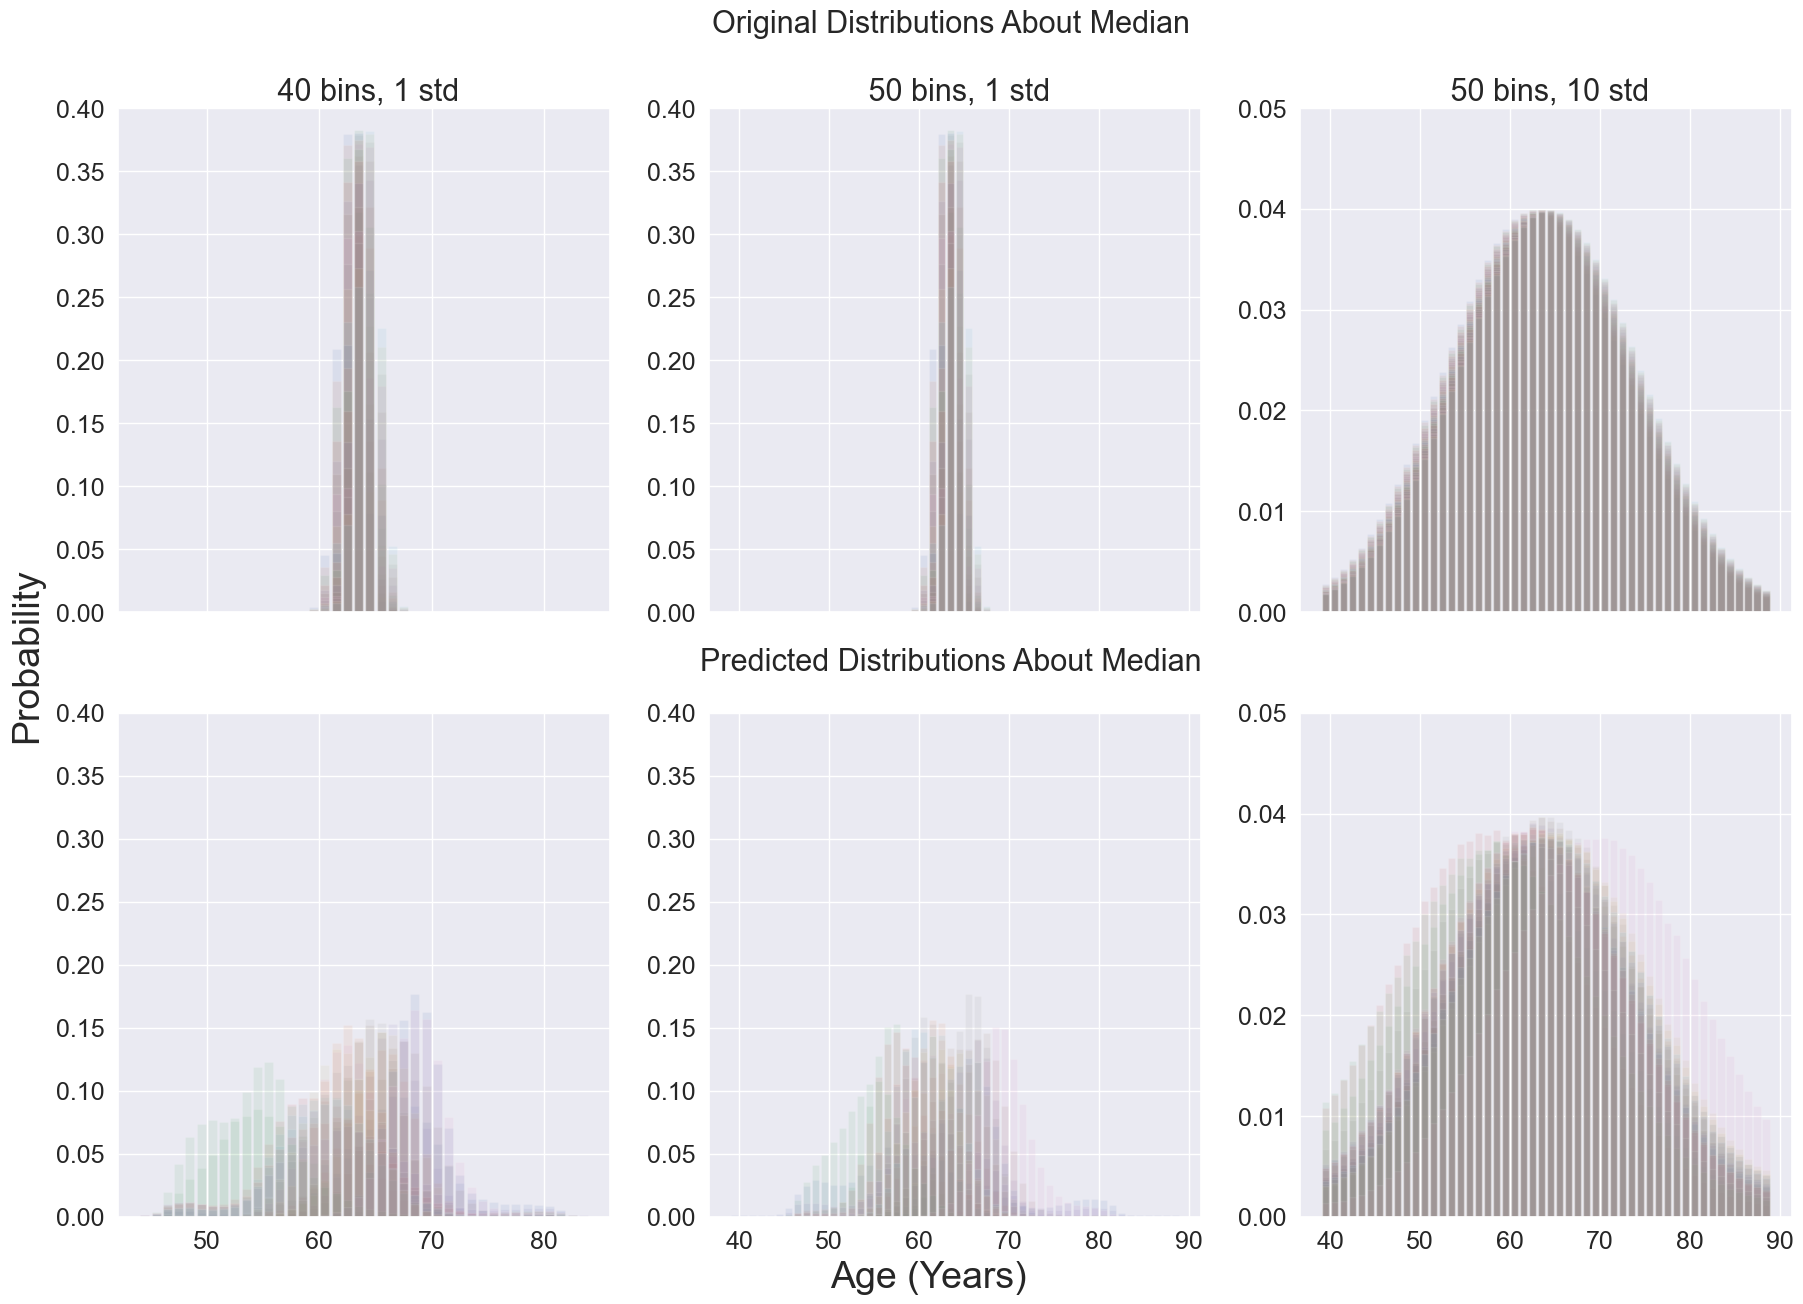

In [104]:
ncols=3
nrows=2
sz=7.2
title_font_size=22
ticks_font_size=18
legend_font = 18

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(ncols*sz,nrows*sz))
axes = axes.ravel()

lims = 200
steps = 20
elems = np.linspace(2510-lims, 2510+lims, steps).astype(int)

for elem in elems:    
    axes[0].bar(original_bins, original_distributions[elem], alpha=0.1)
axes[0].tick_params(axis='x', labelsize= ticks_font_size)
axes[0].tick_params(axis='y', labelsize= ticks_font_size)
axes[0].axes.xaxis.set_ticklabels([])
axes[0].set_ylim([0, 0.4])
axes[0].set_title('\n \n 40 bins, 1 std', fontsize=title_font_size)

for elem in elems:    
    axes[1].bar(original50b_bins, original50b_distributions[elem], alpha=0.1)
axes[1].tick_params(axis='x', labelsize= ticks_font_size)
axes[1].tick_params(axis='y', labelsize= ticks_font_size)
axes[1].axes.xaxis.set_ticklabels([])
axes[1].set_ylim([0, 0.4])
axes[1].set_title('Original Distributions About Median \n \n 50 bins, 1 std', fontsize=title_font_size)


for elem in elems:    
    axes[2].bar(original50b10s_bins, original50b10s_distributions[elem], alpha=0.1)
axes[2].tick_params(axis='x', labelsize= ticks_font_size)
axes[2].tick_params(axis='y', labelsize= ticks_font_size)
axes[2].axes.xaxis.set_ticklabels([])
axes[2].set_ylim([0, 0.05])
axes[2].set_title('\n \n 50 bins, 10 std', fontsize=title_font_size)

for elem in elems:    
    axes[3].bar(original_bins, SFCN_distribution[elem], alpha=0.1)
axes[3].tick_params(axis='x', labelsize= ticks_font_size)
axes[3].tick_params(axis='y', labelsize= ticks_font_size)
# axes[3].axes.xaxis.set_ticklabels([])
axes[3].set_ylim([0, 0.4])


for elem in elems:    
    axes[4].bar(original50b_bins, SFCN50b_distribution[elem], alpha=0.1)
axes[4].tick_params(axis='x', labelsize= ticks_font_size)
axes[4].tick_params(axis='y', labelsize= ticks_font_size)
# axes[4].axes.xaxis.set_ticklabels([])
axes[4].set_ylim([0, 0.4])
axes[4].set_title('Predicted Distributions About Median \n', fontsize=title_font_size)

for elem in elems:    
    axes[5].bar(original50b10s_bins, SFCN50b10s_distribution[elem], alpha=0.1)
axes[5].tick_params(axis='x', labelsize= ticks_font_size)
axes[5].tick_params(axis='y', labelsize= ticks_font_size)
# axes[5].axes.xaxis.set_ticklabels([])
axes[5].set_ylim([0, 0.05])

# fig.supxlabel(['Age (Years)', 'label2'], y=[0.09, 0.2], fontsize=title_font_size+5, verticalalignment='top')
fig.supxlabel('Age (Years)', y=0.08, fontsize=title_font_size+5, verticalalignment='top')
fig.supylabel('Probability', x=0.075, fontsize=title_font_size+5, verticalalignment='center')

fig.savefig('Han_Data_Distributions_OVERLAP.png', bbox_inches='tight')

In [105]:
# Extreme distributions are pushed towards the mean due to the regression towards the mean phenomenon, 
# While the dist in the center are scattered about the median value, as the network finds it difficult to 
# differentiate due to the overalap in the original distributions.
# This phenomenon seems to be somewhat reduced for the 50 bins 10 std, though not fully resolved!

<AxesSubplot:ylabel='Density'>

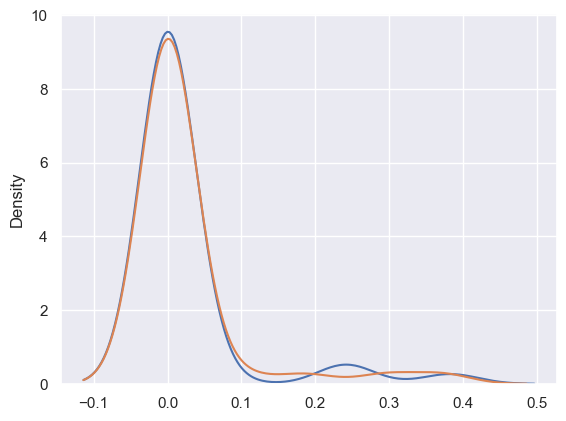

In [106]:
sns.kdeplot(original_distributions[0])
sns.kdeplot(original_distributions[-1])